In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [ ]:
!pip install mplcyberpunk

In [ ]:
import mplcyberpunk
plt.style.use("cyberpunk")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam.csv", encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
df.sample(5)

,v1,v2
4862,spam,Bored housewives! Chat n date now! 0871750.77....
950,ham,"Awesome, lemme know whenever you're around"
1515,ham,I wonder if you'll get this text?
1631,ham,We not watching movie already. Xy wants 2 shop...
5348,ham,Do I? I thought I put it back in the box


In [ ]:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
3035,ham,;-) ok. I feel like john lennon.
2164,ham,"Nothing really, just making sure everybody's u..."
542,ham,But am going to college pa. What to do. are el...
2861,spam,Adult 18 Content Your video will be with you s...
1849,ham,You got job in wipro:)you will get every thing...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep = 'first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

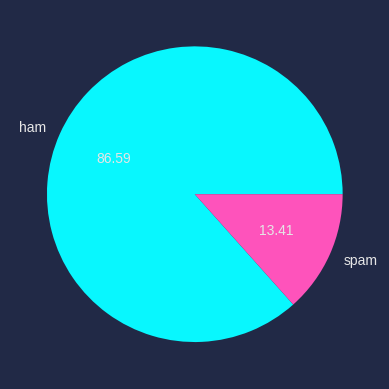

In [ ]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

<Axes: xlabel='target', ylabel='count'>

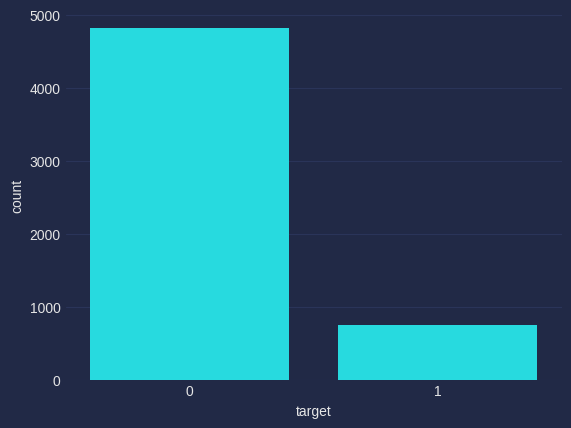

In [ ]:
import seaborn as sns
sns.countplot(x = 'target', data = df)

In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5572, dtype: int64

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df['num_sentences']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5572, dtype: int64

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


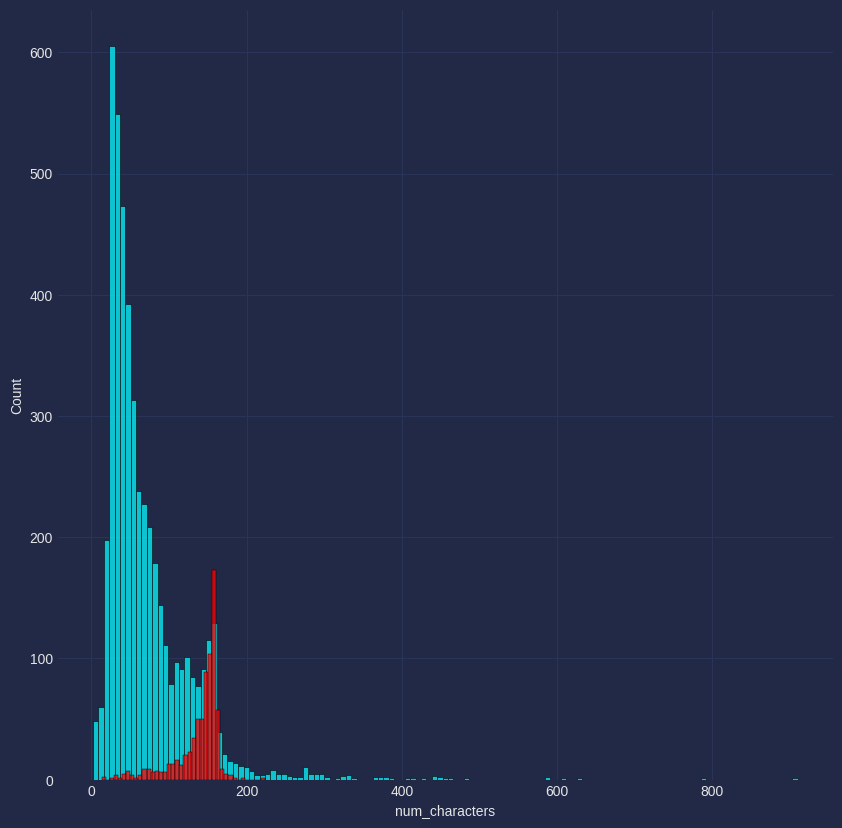

In [ ]:
plt.figure(figsize = (10,10))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')
mplcyberpunk.make_lines_glow()

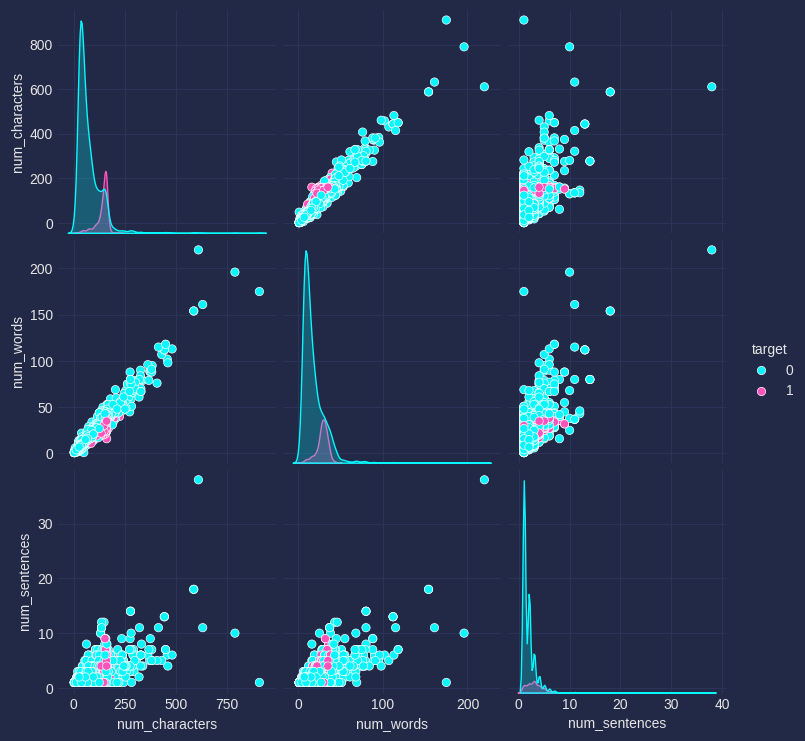

In [ ]:
sns.pairplot(df, hue = 'target')
mplcyberpunk.make_lines_glow()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

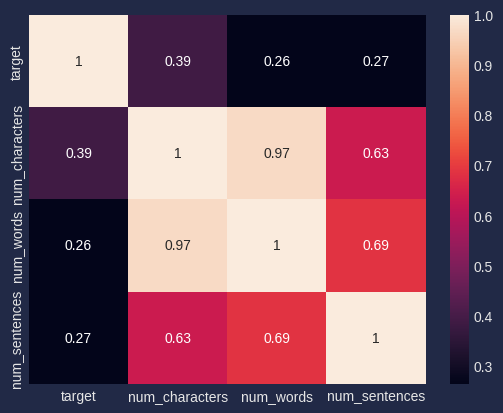

In [ ]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
        y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

  text = y[:]
  y.clear()

  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
#import string
#string.punctuation

In [ ]:
from nltk.stem.porter import*
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

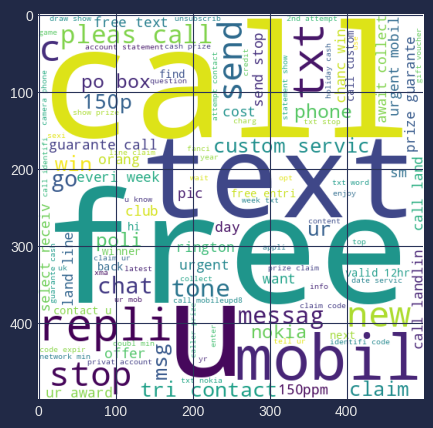

In [ ]:
plt.figure(figsize = (10, 5))
plt.imshow(spam_wc)

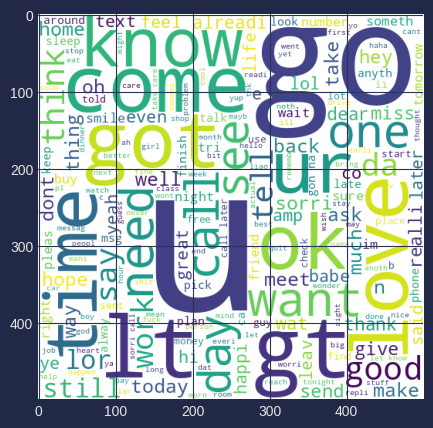

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (10, 5))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
print(len(spam_corpus))
print(len(ham_corpus))

11490
38221


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'ur'),
  Text(5, 0, 'u'),
  Text(6, 0, 'text'),
  Text(7, 0, 'mobil'),
  Text(8, 0, '4'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'stop'),
  Text(11, 0, 'repli'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'tone'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'new'),
  Text(18, 0, 'nokia'),
  Text(19, 0, 'award'),
  Text(20, 0, 'week'),
  Text(21, 0, 'cash'),
  Text(22, 0, 'urgent'),
  Text(23, 0, 'win'),
  Text(24, 0, 'contact'),
  Text(25, 0, 'pleas'),
  Text(26, 0, 'phone'),
  Text(27, 0, 'c'),
  Text(28, 0, 'custom'),
  Text(29, 0, 'collect')])

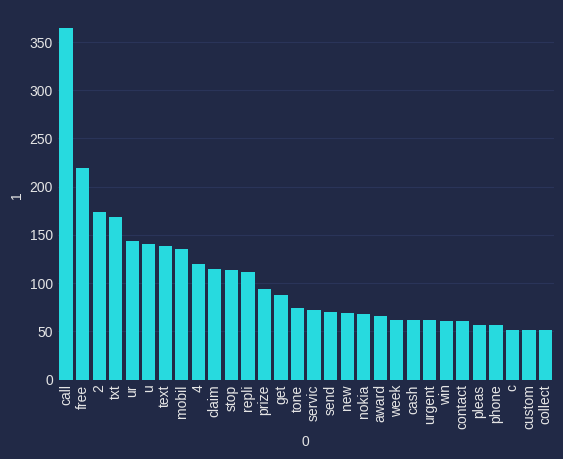

In [ ]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

<Figure size 2000x2000 with 0 Axes>

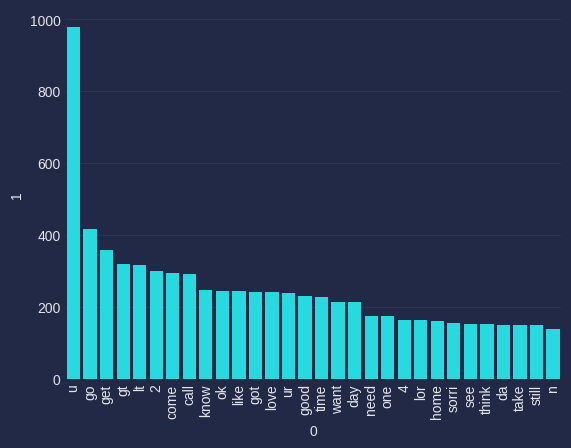

<Figure size 2000x2000 with 0 Axes>

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.figure(figsize = (20,20))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()

In [ ]:
X = v.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5572, 6708)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [ ]:
X_train.shape

(4457, 6708)

In [ ]:
#imported Ann through keras API and tensorflow
#ANN is just to check how the it performs on the dataset
classifier_model = tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (6708,)))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               670900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 678551 (2.59 MB)
Trainable params: 678551 

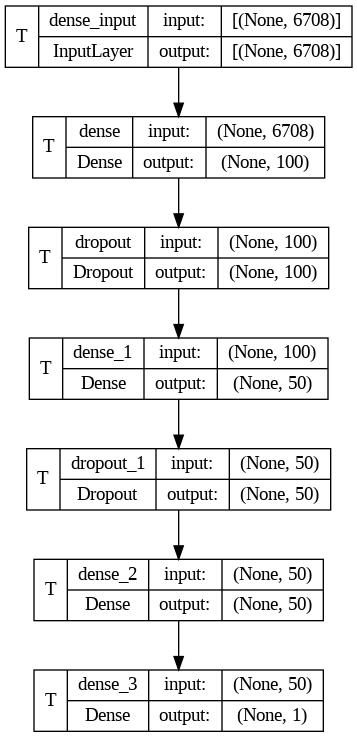

In [ ]:
tf.keras.utils.plot_model(classifier_model, to_file = 'model.png', show_shapes = True, show_dtype = False, show_trainable = True)

In [ ]:
classifier_model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
er = EarlyStopping(monitor = 'val_loss')

In [ ]:
classifier_model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 50, callbacks = [er])

Epoch 1/50
140/140 [==============================] - 3s 13ms/step - loss: 0.3006 - accuracy: 0.8842 - val_loss: 0.1603 - val_accuracy: 0.9623
Epoch 2/50
140/140 [==============================] - 2s 12ms/step - loss: 0.0886 - accuracy: 0.9789 - val_loss: 0.1213 - val_accuracy: 0.9668
Epoch 3/50
140/140 [==============================] - 2s 15ms/step - loss: 0.0534 - accuracy: 0.9845 - val_loss: 0.1018 - val_accuracy: 0.9713
Epoch 4/50
140/140 [==============================] - 2s 16ms/step - loss: 0.0361 - accuracy: 0.9899 - val_loss: 0.1084 - val_accuracy: 0.9659


In [ ]:
hist = classifier_model.history.history

In [ ]:
hist

{'loss': [0.3006131052970886,
  0.08862828463315964,
  0.05339036136865616,
  0.03608519583940506],
 'accuracy': [0.8842270374298096,
  0.9789095520973206,
  0.9845187067985535,
  0.9899035096168518],
 'val_loss': [0.16032378375530243,
  0.1212606281042099,
  0.10180632770061493,
  0.10835069417953491],
 'val_accuracy': [0.9623318314552307,
  0.9668161273002625,
  0.9713004231452942,
  0.9659192562103271]}

In [ ]:
hist = pd.DataFrame(hist)

In [ ]:
hist

,loss,accuracy,val_loss,val_accuracy
0,0.300613,0.884227,0.160324,0.962332
1,0.088628,0.978910,0.121261,0.966816
2,0.053390,0.984519,0.101806,0.971300
3,0.036085,0.989904,0.108351,0.965919


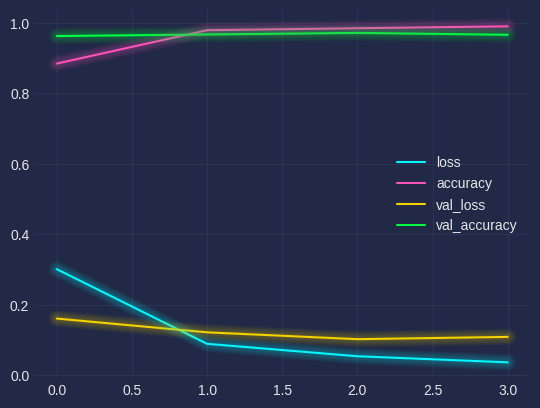

In [ ]:
hist.plot()
mplcyberpunk.make_lines_glow()

In [ ]:
y_pred = classifier_model.predict(X_test)

35/35 [==============================] - 0s 3ms/step


In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_pred,y_test)
cm = confusion_matrix(y_pred,y_test)

<Axes: >

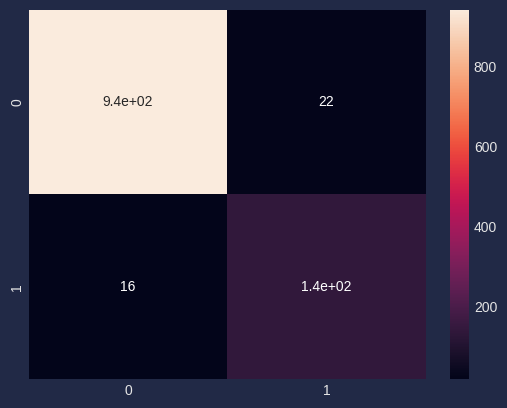

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
print("Testing report:\n",classification_report(y_pred,y_test))

Testing report:
               precision    recall  f1-score   support

       False       0.98      0.98      0.98       963
        True       0.86      0.89      0.88       152

    accuracy                           0.97      1115
   macro avg       0.92      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
classifier_model.save('Spam_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle
from tensorflow.keras.models import load_model
pickle.dump(v, open('vectorizer.pkl', 'wb'))
model = load_model('Spam_classifier.h5')